<a href="https://colab.research.google.com/github/loujjj/Machine-Learning/blob/main/PCT04_Tabor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Classification of Ten(10) Different Balls**

####**Importing the Necessary Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import cv2 as cv
import fnmatch

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

####**Importing and Preparing the Data**

#####**Importing the Data**

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [3]:
cd gdrive/MyDrive/'Colab Notebooks'/Book/BallsDatasets

/content/gdrive/MyDrive/Colab Notebooks/Book/BallsDatasets


**NOTE: You have to save the attached csv file to one of your subfolders in Google Drive and change the name of the subfolder below, accordingly.**

In [4]:
ls

 baseball00.jpg           bowling20.jpg          soccer29.jpg
 baseball01.jpg           bowling21.png          soccer30.jpg
 baseball02.png           bowling22.png          soccer31.jpg
 baseball03.jpg           bowling23.png          soccer32.jpg
 baseball04.jpg           bowling24.jpg          soccer33.png
 baseball05.jpg           bowling25.png          soccer34.jpg
 baseball06.png           bowling26.png          soccer36.jpg
 baseball07.jpg           bowling27.jpg          soccer37.png
 baseball08.jpeg          bowling28.jpg          soccer38.png
 baseball09.jpeg          bowling29.jpg          soccer39.png
 baseball10.jpg           bowling30.png          soccer40.jpg
 baseball11.jpg           bowling31.png          soccer41.jpg
 baseball12.jpg           bowling32.png          soccer42.jpg
 baseball13.jpg           bowling34.jpg          soccer43.jpg
 baseball14.jpg           bowling35.jpg          soccer44.jpg
 baseball15.jpg           bowling36.png          soccer45.jpg
 basebal

In [5]:
organize = pd.DataFrame.from_dict(os.listdir())
random   = organize.sample(frac=1, random_state=1).reset_index()
data     = pd.DataFrame(random)[0].values.tolist()

In [6]:
print(data)

['volleyball01.jpg', 'golf45.jpg', 'volleyball09.jpg', 'baseball14.jpg', 'soccer36.jpg', 'baseball37.png', 'golf19.jpg', 'tennis14.jpg', 'tennis01.jpg', 'basketball41 (1).jpg', 'basketball30 (2).png', 'basketball40.jpg', 'soccer10.jpg', 'tennis08.jpg', 'tabletennis35.jpg', 'tabletennis17.jpg', 'tennis17.jpg', 'tabletennis21.png', 'golf04.jpg', 'billiards20.jpg', 'volleyball43.png', 'basketball47.png', 'tabletennis51.jpg', 'soccer53.jpeg', 'basketball45.png', 'baseball00.jpg', 'golf35 (1).jpg', 'bowling46.jpg', 'soccer50.jpg', 'volleyball21.png', 'football47.jpg', 'football13.png', 'basketball29.jpg', 'bowling20.jpg', 'billiards01.png', 'baseball51.jpeg', 'volleyball35.png', 'football09 (1).png', 'billiards25.jpg', 'bowling07.jpeg', 'soccer48.jpg', 'golf34.jpg', 'football20.jpg', 'football10.jpg', 'golf07 (2).jpeg', 'tabletennis11.jpg', 'football26.jpg', 'baseball38.png', 'tabletennis42.jpg', 'bowling52.jpeg', 'volleyball56.jpeg', 'golf13.png', 'tennis46.jpg', 'basketball24.jpg', 'baske

In [7]:
m = 0
balls_folder = []
for file in data:
  image = cv.imread(file)
  if image.shape == (28,28,3):
    balls_folder.append(image)
  else:
    m += 1
print(str(m) + ' images were not rescaled to 28x28 and are now excluded.')

1 images were not rescaled to 28x28 and are now excluded.


In [8]:
print(balls_folder[0].shape)
print(len(balls_folder))

(28, 28, 3)
553


[[[255 251 255]
  [255 250 255]
  [255 254 255]
  ...
  [246 253 255]
  [249 251 255]
  [253 253 255]]

 [[255 253 255]
  [255 253 255]
  [251 250 252]
  ...
  [248 254 255]
  [252 253 255]
  [253 252 254]]

 [[255 255 251]
  [255 255 252]
  [255 255 255]
  ...
  [253 255 255]
  [255 255 254]
  [255 254 250]]

 ...

 [[255 251 255]
  [255 251 255]
  [253 255 255]
  ...
  [255 255 252]
  [255 255 252]
  [255 255 252]]

 [[255 252 255]
  [255 251 255]
  [249 251 251]
  ...
  [255 255 252]
  [250 255 255]
  [246 255 255]]

 [[255 252 255]
  [255 254 255]
  [253 255 255]
  ...
  [255 255 252]
  [246 255 255]
  [243 253 255]]]


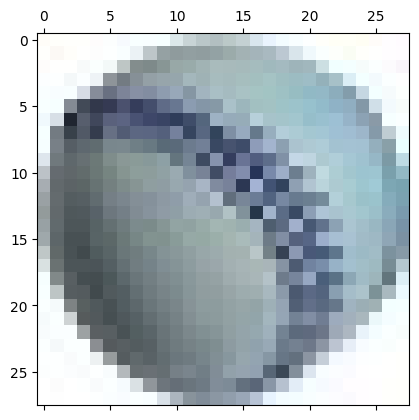

In [10]:
print(balls_folder[0])
plt.matshow(balls_folder[552]) #sample ball image

In [11]:
balls_flat = np.stack((balls_folder[i] for i in range(len(balls_folder))))
print(balls_flat.shape)

(553, 28, 28, 3)


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


In [12]:
baseballXX    = 'baseball*'
basketballXX  = 'basketball*'
billiardsXX   = 'billiards*'
bowlingXX     = 'bowling*'
footballXX    = 'football*'
golfXX        = 'golf*'
soccerXX      = 'soccer*'
tabletennisXX = 'tabletennis*'
tennisXX      = 'tennis*'
volleyballXX  = 'volleyball*'
s_name         = []
for filename in data:
  image = cv.imread(filename)
  if image.shape == (28,28,3):
    if fnmatch.fnmatch(filename, baseballXX) == True:
      s_name.append(0)
    elif fnmatch.fnmatch(filename, basketballXX) == True:
      s_name.append(1)
    elif fnmatch.fnmatch(filename, billiardsXX) == True:
      s_name.append(2)
    elif fnmatch.fnmatch(filename, bowlingXX) == True:
      s_name.append(3)
    elif fnmatch.fnmatch(filename, footballXX) == True:
      s_name.append(4)
    elif fnmatch.fnmatch(filename, golfXX) == True:
      s_name.append(5)
    elif fnmatch.fnmatch(filename, soccerXX) == True:
      s_name.append(6)
    elif fnmatch.fnmatch(filename, tabletennisXX) == True:
      s_name.append(7)
    elif fnmatch.fnmatch(filename, tennisXX) == True:
      s_name.append(8)
    elif fnmatch.fnmatch(filename, volleyballXX) == True:
      s_name.append(9)
    else:
      print(filename + str(' is not accounted.'))

s_name = np.reshape(s_name, (len(s_name),))
print(s_name.shape)
print(s_name)

(553,)
[9 5 9 0 6 0 5 8 8 1 1 1 6 8 7 7 8 7 5 2 9 1 7 6 1 0 5 3 6 9 4 4 1 3 2 0 9
 4 2 3 6 5 4 4 5 7 4 0 7 3 9 5 8 1 1 4 0 9 9 1 3 2 7 1 4 9 7 6 1 8 9 7 5 1
 3 5 1 5 5 2 4 0 8 1 3 0 9 0 2 4 1 8 2 7 6 5 0 1 7 4 3 0 4 0 1 9 3 9 6 1 2
 4 2 9 8 4 2 5 4 2 8 7 2 8 1 7 1 7 1 4 6 5 7 1 1 2 7 1 8 4 6 0 4 7 7 5 3 7
 1 2 1 3 8 6 5 9 7 5 7 2 8 5 9 1 5 3 6 6 9 5 0 9 0 4 5 8 5 7 6 3 1 4 5 3 0
 6 3 7 2 3 1 9 7 3 5 4 2 4 6 5 2 6 7 3 3 7 2 6 1 8 2 5 4 2 2 8 5 1 3 4 4 8
 6 0 5 0 5 0 9 8 5 3 8 5 2 9 1 5 1 0 3 4 7 9 3 4 6 7 6 4 3 1 8 2 1 2 1 6 1
 1 7 3 3 4 2 5 9 9 0 4 7 2 5 8 4 5 7 1 4 1 1 4 2 8 5 3 9 0 5 5 4 5 6 4 4 8
 7 7 3 9 0 6 5 7 7 6 9 8 8 3 6 7 9 2 9 5 5 9 1 4 1 1 1 3 7 4 5 4 5 5 0 0 6
 8 5 1 2 0 3 0 0 1 8 8 2 6 5 2 1 8 0 4 9 6 8 0 3 7 4 6 1 7 0 3 4 9 6 9 4 0
 6 2 4 6 8 7 1 6 3 6 0 8 5 5 9 6 8 8 9 5 0 3 8 5 1 1 3 5 0 6 4 1 6 1 7 9 5
 6 1 0 8 7 7 1 8 8 1 8 9 9 3 2 1 7 2 0 2 4 5 7 1 4 6 2 5 7 2 9 3 5 5 6 8 0
 5 0 0 5 0 5 9 7 8 5 7 5 0 0 9 5 4 0 1 6 0 3 2 9 1 0 2 5 6 4 9 5 4 4 3 7 5
 3 2 7 6 2 1 4 1 9

#####**Preparing the Data**

In [13]:
trainRatio = 75/100
testRatio = 15/100
valRatio = 10/100
X_train,X_test,y_train, y_test = train_test_split(balls_flat, s_name, test_size = 1 - trainRatio)
X_val,X_test,y_val, y_test = train_test_split(balls_flat, s_name, test_size = testRatio/(testRatio+valRatio))

#trainRatio = 80/100
#testRatio = 20/100
#X_train,X_test, y_train, y_test = train_test_split(balls_flat, s_name, test_size = 1 - trainRatio)

In [14]:
X_train = X_train/255
X_test = X_test/255

print(X_train.shape)
print(X_test.shape)

(414, 28, 28, 3)
(332, 28, 28, 3)


In [15]:
X_train_flat = X_train.reshape(len(X_train),28,28,3)
X_test_flat = X_test.reshape(len(X_test),28,28,3)
print(X_train_flat.shape)
print(X_test_flat.shape)

(414, 28, 28, 3)
(332, 28, 28, 3)


In [16]:
print(X_train.shape)
print(y_train.shape)

(414, 28, 28, 3)
(414,)


####**Defining the model**

In [101]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
  
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),   

    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 26, 26, 64)        1792      
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 dropout_35 (Dropout)        (None, 13, 13, 64)        0         
                                                                 
 conv2d_35 (Conv2D)          (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 5, 5, 128)        0         
 g2D)                                                            
                                                                 
 dropout_36 (Dropout)        (None, 5, 5, 128)       

In [105]:
model.compile(keras.optimizers.Adam(learning_rate=0.001),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              # loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [106]:
history = model.fit(X_train, y_train, epochs=300, validation_data=(X_val, y_val), verbose=1)

Epoch 1/300
13/13 [==============================] - 3s 130ms/step - loss: 0.1896 - accuracy: 0.9493 - val_loss: 267.6364 - val_accuracy: 0.7195
Epoch 2/300
13/13 [==============================] - 1s 113ms/step - loss: 0.1748 - accuracy: 0.9444 - val_loss: 278.4843 - val_accuracy: 0.6652
Epoch 3/300
13/13 [==============================] - 1s 113ms/step - loss: 0.1373 - accuracy: 0.9589 - val_loss: 233.7378 - val_accuracy: 0.7104
Epoch 4/300
13/13 [==============================] - 1s 111ms/step - loss: 0.1689 - accuracy: 0.9541 - val_loss: 278.8077 - val_accuracy: 0.6878
Epoch 5/300
13/13 [==============================] - 2s 178ms/step - loss: 0.1451 - accuracy: 0.9565 - val_loss: 232.3972 - val_accuracy: 0.6833
Epoch 6/300
13/13 [==============================] - 3s 195ms/step - loss: 0.1520 - accuracy: 0.9469 - val_loss: 202.7731 - val_accuracy: 0.6923
Epoch 7/300
13/13 [==============================] - 2s 120ms/step - loss: 0.1409 - accuracy: 0.9589 - val_loss: 170.3794 - val_ac

In [107]:
model.evaluate(X_test_flat, y_test)

11/11 [==============================] - 0s 25ms/step - loss: 0.4689 - accuracy: 0.9488


[0.46892473101615906, 0.9487951993942261]

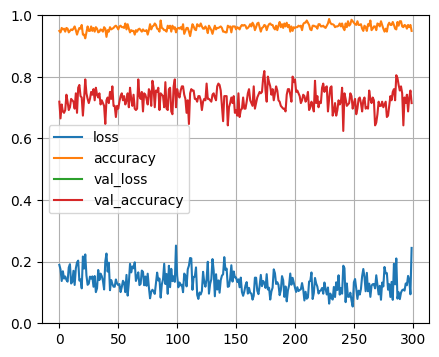

In [108]:
pd.DataFrame(history.history).plot(figsize=(5,4))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [109]:
prediction = model.predict(X_test_flat)
print(prediction)

11/11 [==============================] - 0s 20ms/step
[[4.17714929e-08 6.69100497e-10 2.77541240e-10 ... 9.99998987e-01
  4.23415230e-07 7.11779222e-08]
 [1.04210273e-17 9.99985635e-01 1.32885425e-09 ... 2.65787703e-09
  9.76740244e-10 8.12470424e-10]
 [9.99935567e-01 2.45101834e-12 1.54091381e-07 ... 1.46144803e-05
  1.72418926e-10 3.60199078e-06]
 ...
 [4.19675303e-37 7.18249534e-27 1.09624588e-24 ... 3.56999233e-31
  1.46697407e-37 0.00000000e+00]
 [3.85558642e-12 5.89036975e-31 2.32682287e-18 ... 7.72493893e-20
  1.41770841e-21 1.00828096e-16]
 [9.97556806e-01 2.17261799e-12 3.22422835e-07 ... 1.14292861e-05
  3.65229069e-10 2.06495287e-07]]


In [110]:
print(prediction[0])

[4.1771493e-08 6.6910050e-10 2.7754124e-10 6.4510511e-12 2.5327454e-10
 4.3928898e-07 2.4045856e-11 9.9999899e-01 4.2341523e-07 7.1177922e-08]


In [111]:
np.argmax(prediction[0])

7

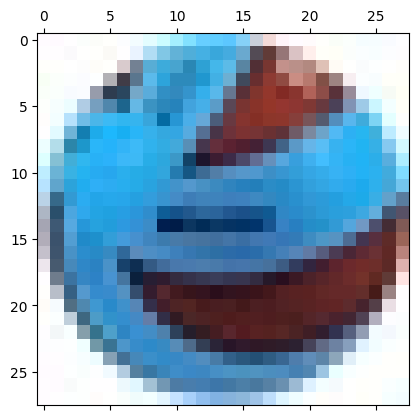

In [112]:
plt.matshow(balls_folder[0])

In [113]:
predicted_labels = [np.argmax(i) for i in prediction]

In [115]:
cm = confusion_matrix(y_test, prediction.argmax(axis=1))
print(cm)

[[31  0  0  0  1  1  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  0 28  0  0  1  0  0  2  0]
 [ 0  0  0 30  0  0  0  0  0  0]
 [ 1  0  0  0 33  0  0  0  0  0]
 [ 0  0  0  0  0 37  0  0  2  0]
 [ 0  0  0  1  0  0 27  0  0  0]
 [ 1  0  0  0  0  1  0 38  0  1]
 [ 0  0  0  0  0  0  0  1 28  0]
 [ 1  0  0  0  1  1  1  0  0 27]]


Text(33.22222222222222, 0.5, 'True Label')

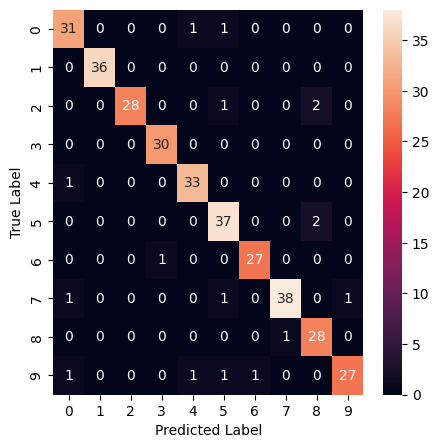

In [116]:
import seaborn as sn
plt.figure(figsize = (5,5))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

In [117]:
accuracy = 100*np.trace(cm)/np.sum(cm)
print(accuracy)

94.87951807228916
